In [0]:
# This file contains code for 2 operations:
# 1. Add country column to ../TweetRelated/CleanedTweetsInfo.csv which will be further used for sentiment analysis
# 2. Plot number of Tweets vs country graph

# -*- coding: utf-8 -*-
import pandas as pd
import unicodedata
import matplotlib.font_manager as fm
from matplotlib.ft2font import FT2Font
from __future__ import unicode_literals
import matplotlib.pyplot as plt

In [0]:
def get_tweets_country():
    df_country = pd.read_csv('tweetsCountry.csv', delimiter="\t", header=None)

    df_country.columns = ['Geo_Place']

    df_country['Geo_Country'] = None

    for index, row in df_country.iterrows():
        place_list = row['Geo_Place'].rsplit(',', 1)
        row['Geo_Country'] = place_list[len(place_list) - 1]
    return df_country

In [0]:
def get_user_location_country_map(df_country):
    df_unique_locations = pd.read_csv('uniqueLocations.csv', delimiter="\t", header=None)
    df_unique_locations.columns = ['Tweet_Place']

    # Create new dataframe of Tweet_Place and Geo_Country
    tweet_country_df = pd.DataFrame(columns=['Tweet_Place', 'Geo_Country'])
    tweet_country_df['Tweet_Place'] = df_unique_locations['Tweet_Place']
    tweet_country_df['Geo_Country'] = df_country['Geo_Country']
    return tweet_country_df

In [0]:
def add_country_column(tweet_country_df):
    cleaned_tweets_info_df = pd.read_csv('../CleanedTweetsInfo.csv')

    tweet_info_country_merge_df = pd.merge(cleaned_tweets_info_df, tweet_country_df, how='left', left_on='UserLocation',
                                           right_on='Tweet_Place')

    tweet_info_country_merge_df.dropna(inplace=True, axis=0)

    print(tweet_info_country_merge_df)

    # The below line is commented in order to avoid rewriting of file. Uncomment for creating new file
    # tweet_info_country_merge_df.to_csv("../TweetRelated/CleanedTweetsInfo.csv")

    return tweet_info_country_merge_df


In [24]:
# Function calls
df_country = get_tweets_country()
user_location_country_df = get_user_location_country_map(df_country)
tweet_info_country_merge_df = add_country_column(user_location_country_df)


       Unnamed: 0  Unnamed: 0.1  ...                Tweet_Place   Geo_Country
0               0             0  ...                  Conectica       România
1               1             1  ...            Your Conscience          None
2               2             3  ...        Bayern, Deutschland   Deutschland
3               3             4  ...                London(ish)          None
4               4             5  ...                爱的就是你...♡•♡          None
...           ...           ...  ...                        ...           ...
44611       43319         91100  ...     Ireland (Free Belfast)          None
44612       43320         91101  ...      San Isidro, Argentina     Argentina
44613       43321         91103  ...  NY , Luxembourg , Tunisia          None
44614       43322         91104  ...                    Toronto        Canada
44615       43323         91105  ...             Nairobi-kenya.         Kenya

[44616 rows x 18 columns]


In [0]:
def plot_tweet_count_countries(tweet_info_country_merge_df):
    grouped_df = tweet_info_country_merge_df.groupby('Geo_Country')['Tweet_content'].count().reset_index()
    grouped_df['Geo_Country'] = grouped_df[grouped_df != 'None']
    grouped_df.dropna(inplace=True)

    ############################################################################
    ax = grouped_df.plot(x=grouped_df.columns[0], y=grouped_df.columns[1])
    ax.set_ylabel("Number of Tweets")
    ax.set_xlabel("Countries")
    plt.xticks(rotation=90)
    plt.show()


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


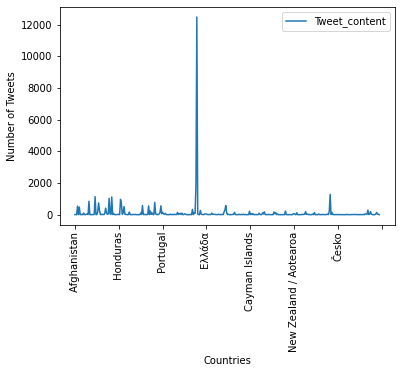

In [62]:
# Plot graph of number of tweets vs countries
plot_tweet_count_countries(tweet_info_country_merge_df)
